In [72]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [73]:
data = np.load('../data/sdss_photoz.npy')

In [70]:
data = data[~(data<0).any(axis=1)]
N = len(data)
X = np.zeros((N, 4))
X[:, 0] = data[:, 0] - data[:, 1] # u - g
X[:, 1] = data[:, 1] - data[:, 2] # g - r
X[:, 2] = data[:, 2] - data[:, 3] # r - i
X[:, 3] = data[:, 3] - data[:, 4] # i - z
z = data[:, 5] # redshift

In [71]:
np.savez('sdss_photoz_ugrizz.npz', photom=data[:,:-1], redshift=z)
np.savez('sdss_photoz_colorsz.npz', colors=X, redshift=z)

In [16]:
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.25, random_state=42)

In [29]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=20)
clf.fit(X_train, z_train)
z_pred = clf.predict(X_test)

In [30]:
rms = np.sqrt(np.mean((z_test - z_pred) ** 2))
print rms
print len(z_test)
print np.sum(abs(z_test - z_pred) > 1)

0.05300714286066272
1250
0


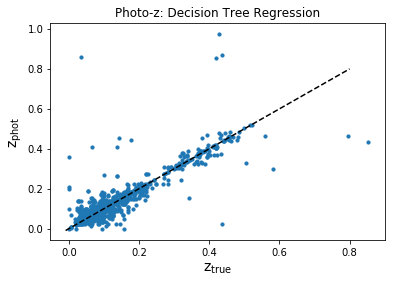

In [31]:
ax = plt.axes()
axis_lim = np.array([-0.01, 0.8])
plt.scatter(z_test, z_pred, s=10)# , c='k', lw=0, s=4)
plt.plot(axis_lim, axis_lim, '--k')

plt.title('Photo-z: Decision Tree Regression')
plt.xlabel(r'$\mathrm{z_{true}}$', fontsize=14)
plt.ylabel(r'$\mathrm{z_{phot}}$', fontsize=14);

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
clf = RandomForestRegressor(100)

In [66]:
z_pred = clf.fit(X_train, z_train).predict(X_test)

In [34]:
rms = np.sqrt(np.mean((z_test - z_pred) ** 2))
print rms
print len(z_test)
print np.sum(abs(z_test - z_pred) > 1.)

0.0370241658708105
1250
0


In [67]:
clf.score(X_test, z_test)

0.8608203669487435

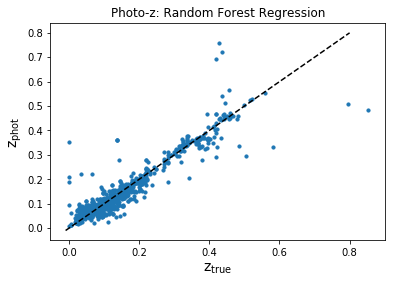

In [35]:
ax = plt.axes()
axis_lim = np.array([-0.01, 0.8])
plt.scatter(z_test, z_pred, s=10)# , c='k', lw=0, s=4)
plt.plot(axis_lim, axis_lim, '--k')

plt.title('Photo-z: Random Forest Regression')
plt.xlabel(r'$\mathrm{z_{true}}$', fontsize=14)
plt.ylabel(r'$\mathrm{z_{phot}}$', fontsize=14);

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
GradientBoostingRegressor?

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

In [57]:
X_train, X_test, z_train, z_test = train_test_split(X_pca, z, test_size=0.25, random_state=42)

In [61]:
clf = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100)

In [62]:
z_pred = clf.fit(X_train, z_train).predict(X_test)

In [64]:
clf.score(X_test, z_test)

0.8435550786291933

In [59]:
rms = np.sqrt(np.mean((z_test - z_pred) ** 2))
print rms
print len(z_test)
print np.sum(abs(z_test - z_pred) > 1.)

0.04057781196044185
1250
0


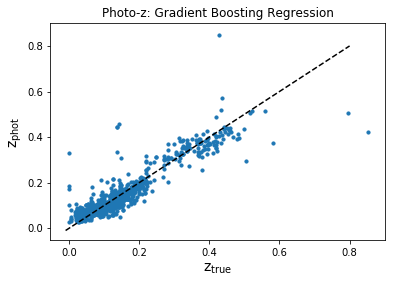

In [60]:
ax = plt.axes()
axis_lim = np.array([-0.01, 0.8])
plt.scatter(z_test, z_pred, s=10)# , c='k', lw=0, s=4)
plt.plot(axis_lim, axis_lim, '--k')

plt.title('Photo-z: Gradient Boosting Regression')
plt.xlabel(r'$\mathrm{z_{true}}$', fontsize=14)
plt.ylabel(r'$\mathrm{z_{phot}}$', fontsize=14);